# EDA


In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)


### Loading the Dataset


In [5]:
# Load the dataset
df = pd.read_csv("rfqs.csv", parse_dates=['DateTime'])

# Display the shape and the first few rows
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Basic info and data types
print("\nData types and null values:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (6403, 11)

First 5 rows:
   Unnamed: 0            DateTime instrument client    price       mid  \
0       94075 2019-01-25 15:58:29          I      F  112.779  112.7416   
1       94087 2019-01-28 09:28:10          B      G  106.065  106.1855   
2       94089 2019-01-28 09:40:24          F      G  107.607  107.5570   
3       94158 2019-01-29 16:21:06          E      F  100.622  100.5820   
4       94194 2019-01-30 16:19:28          F      F  107.297  107.2170   

   vol(MM)     dv01  num_dealers  side  won  
0    2.000   6.0870            5    -1    0  
1    0.500  21.9017            5     1    0  
2    0.975  13.2621            5    -1    0  
3    0.010   4.4853            5    -1    0  
4    0.448  13.2087            5    -1    0  

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6403 entries, 0 to 6402
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0  

In [6]:
df.describe()

,Unnamed: 0,DateTime,price,mid,vol(MM),dv01,num_dealers,side,won
count,6403.000000,6403,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000
mean,310732.564891,2019-06-20 05:30:13.454162176,112.694414,112.662200,2.636600,11.585256,5.561612,-0.058254,0.112916
min,94075.000000,2019-01-25 08:03:15,99.069000,99.082500,0.001000,1.906000,1.000000,-1.000000,0.000000
25%,273751.500000,2019-04-16 15:10:24.500000,103.971000,103.911450,0.050000,7.120000,5.000000,-1.000000,0.000000
50%,326843.000000,2019-06-28 10:49:03,110.751000,110.696200,0.650000,9.530200,5.000000,-1.000000,0.000000
75%,364830.500000,2019-08-19 15:05:51,117.070500,117.066450,3.000000,14.593250,5.000000,1.000000,0.000000
max,397854.000000,2019-10-29 16:15:18,147.153000,147.180900,131.400000,32.491200,21.000000,1.000000,1.000000
std,67590.523661,NaN,9.916090,9.906521,5.989479,6.910370,2.148954,0.998380,0.316515


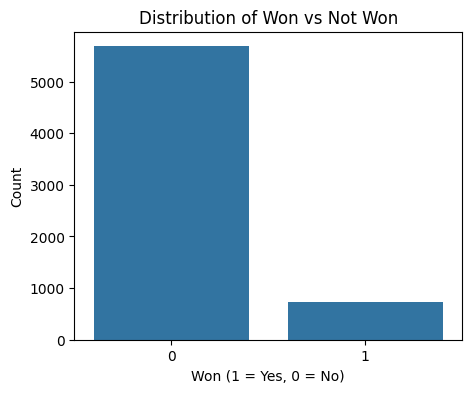

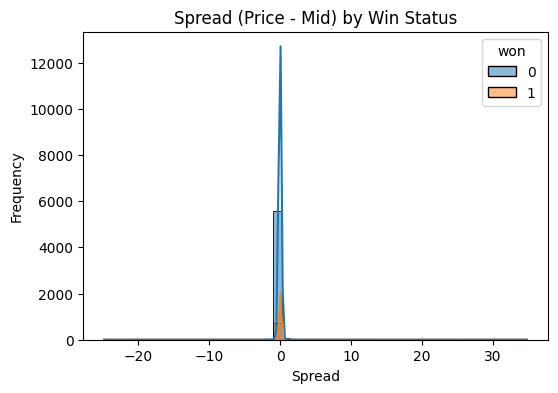

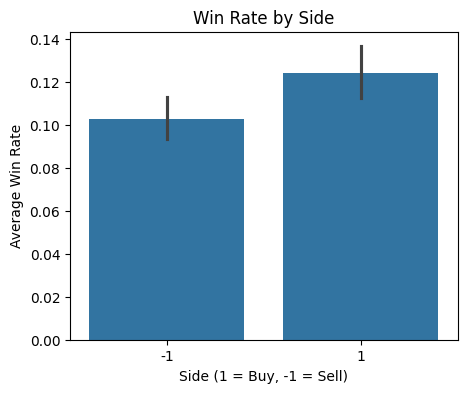

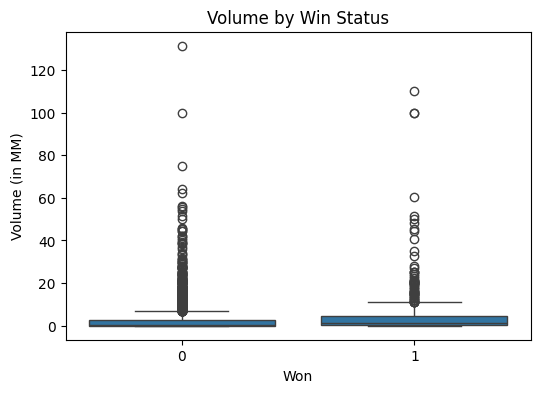

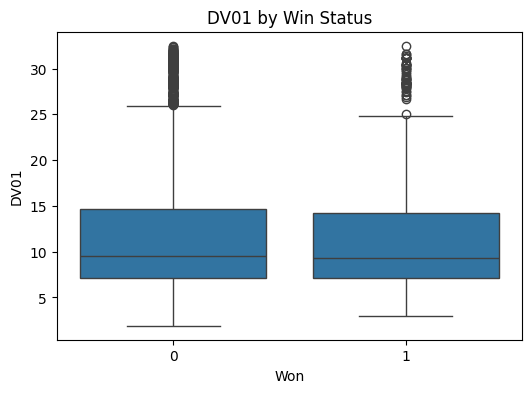

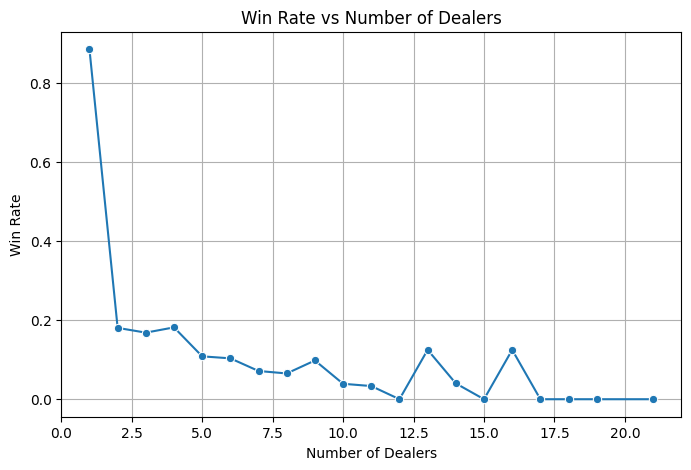

In [7]:
# 1. Distribution of the target variable
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='won')
plt.title("Distribution of Won vs Not Won")
plt.xlabel("Won (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# 2. Spread (quoted price - market mid)
df['spread'] = df['price'] - df['mid']

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='spread', hue='won', bins=50, kde=True)
plt.title("Spread (Price - Mid) by Win Status")
plt.xlabel("Spread")
plt.ylabel("Frequency")
plt.show()

# 3. Side (Buy/Sell)
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='side', y='won')
plt.title("Win Rate by Side")
plt.xlabel("Side (1 = Buy, -1 = Sell)")
plt.ylabel("Average Win Rate")
plt.show()

# 4. Distribution of volume
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='won', y='vol(MM)')
plt.title("Volume by Win Status")
plt.xlabel("Won")
plt.ylabel("Volume (in MM)")
plt.show()

# 4. Distribution of dv01
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='won', y='dv01')
plt.title("DV01 by Win Status")
plt.xlabel("Won")
plt.ylabel("DV01")
plt.show()

# 5. Won Rate by Number of dealers
dealer_win_rate = df.groupby('num_dealers')['won'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=dealer_win_rate, x='num_dealers', y='won', marker='o')
plt.title("Win Rate vs Number of Dealers")
plt.xlabel("Number of Dealers")
plt.ylabel("Win Rate")
plt.grid(True)
plt.show()





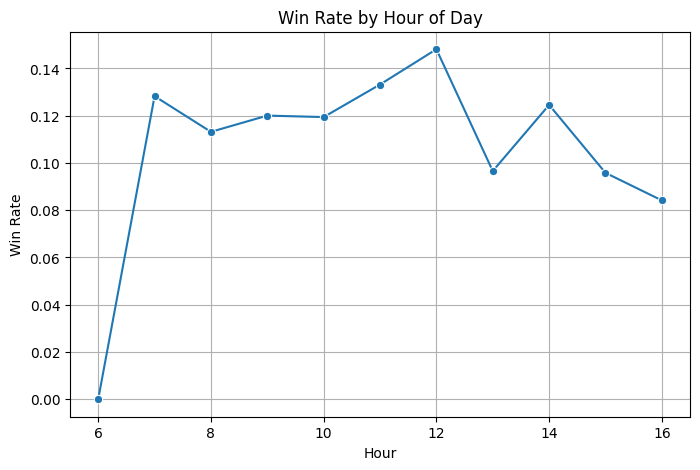

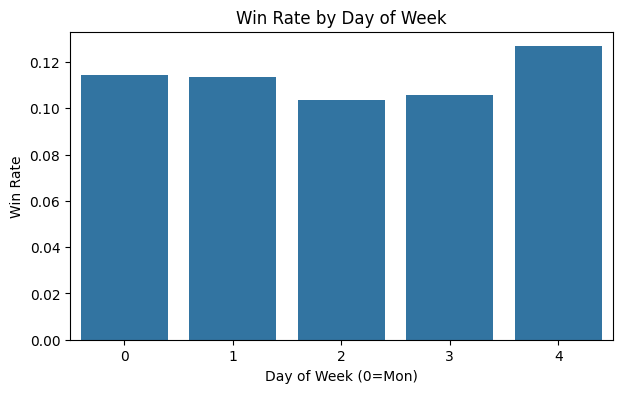

In [8]:
# Add time features
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek  # 0=Mon

# Win rate by hour
hourly_win = df.groupby('hour')['won'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=hourly_win, x='hour', y='won', marker='o')
plt.title("Win Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Win Rate")
plt.grid(True)
plt.show()

# Win rate by weekday
dow_win = df.groupby('dayofweek')['won'].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=dow_win, x='dayofweek', y='won')
plt.title("Win Rate by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Win Rate")
plt.show()


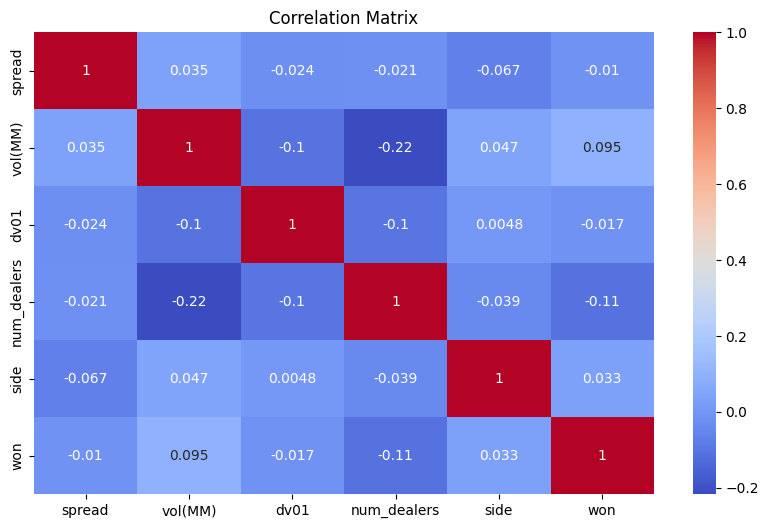

In [9]:
# Encode 'side' for correlation
df_corr = df.copy()
df_corr['side'] = df_corr['side'].astype(int)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr[['spread', 'vol(MM)', 'dv01', 'num_dealers', 'side', 'won']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [10]:

client_win_rate = df.groupby('client')['won'].mean().sort_values(ascending=False)
instrument_win_rate = df.groupby('instrument')['won'].mean().sort_values(ascending=False)

print("Top clients by win rate:")
print(client_win_rate.head())

print("\nTop instruments by win rate:")
print(instrument_win_rate.head())


Top clients by win rate:
client
G    0.160714
F    0.152318
A    0.127463
B    0.088877
D    0.084399
Name: won, dtype: float64

Top instruments by win rate:
instrument
L    0.158854
C    0.142061
A    0.130435
K    0.128205
H    0.120370
Name: won, dtype: float64


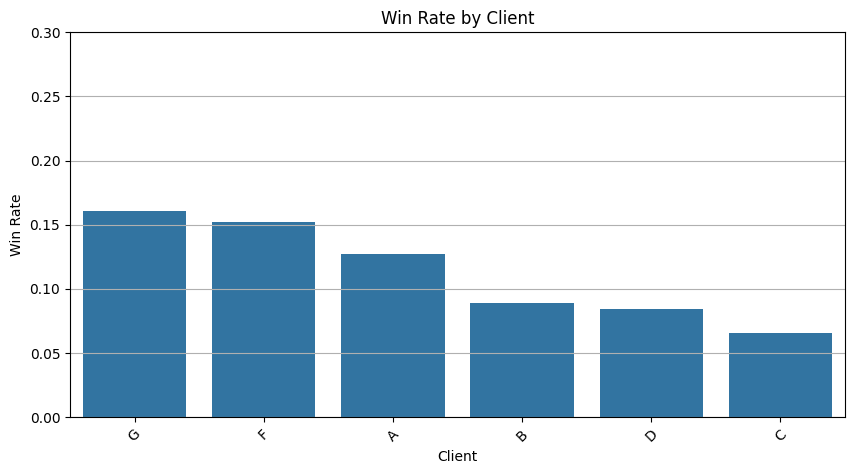

In [11]:
# Top clients by volume
top_clients = df['client'].value_counts().head(20).index
client_avg_win = df[df['client'].isin(top_clients)].groupby('client')['won'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=client_avg_win.index, y=client_avg_win.values)
plt.title("Win Rate by Client")
plt.xlabel("Client")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.ylim(0, 0.3)
plt.grid(True, axis='y')
plt.show()


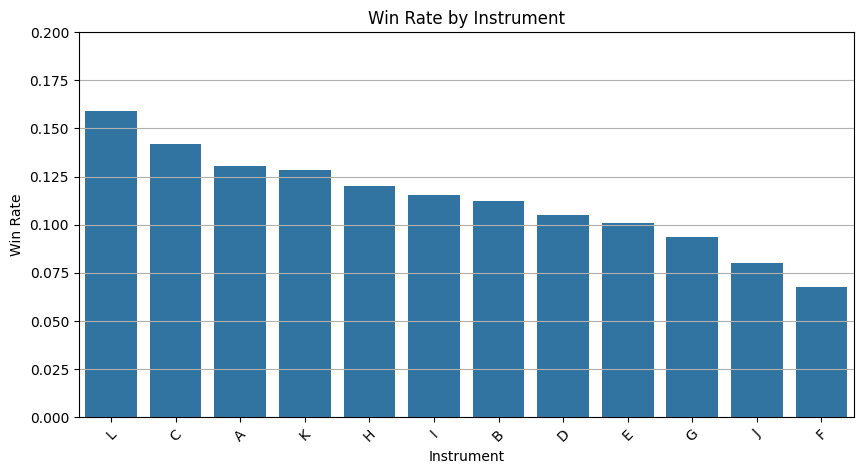

In [12]:
# Top instruments by volume
top_instruments = df['instrument'].value_counts().head(20).index
instr_avg_win = df[df['instrument'].isin(top_instruments)].groupby('instrument')['won'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=instr_avg_win.index, y=instr_avg_win.values)
plt.title("Win Rate by Instrument")
plt.xlabel("Instrument")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.ylim(0, 0.2)
plt.grid(True, axis='y')
plt.show()


# ML


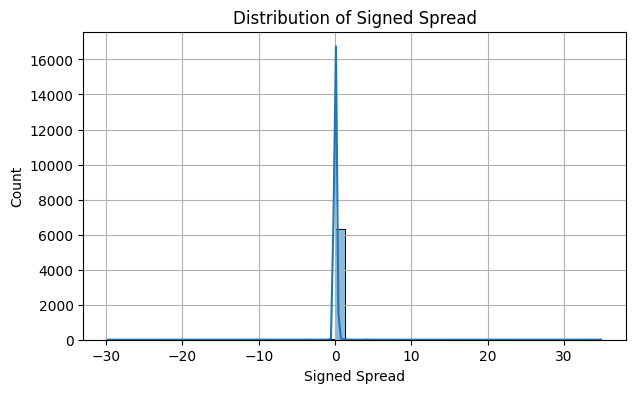

count    6403.000000
mean        0.066015
std         0.962069
min       -29.757500
25%         0.007900
50%         0.028500
75%         0.053300
max        34.866100
Name: signed_spread, dtype: float64


In [13]:
# Create signed_spread: spread * side
df['signed_spread'] = df['spread'] * df['side'] * -1

# Check distribution
plt.figure(figsize=(7,4))
sns.histplot(df['signed_spread'], bins=50, kde=True)
plt.title("Distribution of Signed Spread")
plt.xlabel("Signed Spread")
plt.grid(True)
plt.show()

# Quick summary
print(df['signed_spread'].describe())


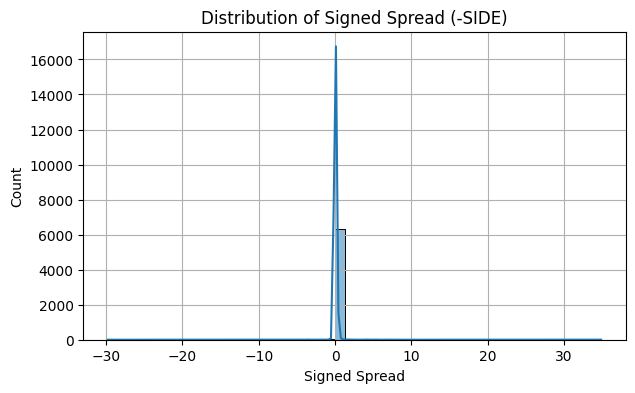

count    6403.000000
mean        0.066015
std         0.962069
min       -29.757500
25%         0.007900
50%         0.028500
75%         0.053300
max        34.866100
Name: signed_spread, dtype: float64


In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['signed_spread'], bins=50, kde=True)
plt.title("Distribution of Signed Spread (-SIDE)")
plt.xlabel("Signed Spread")
plt.grid(True)
plt.show()

print(df['signed_spread'].describe())


In [15]:
df.head(10)

,Unnamed: 0,DateTime,instrument,client,price,mid,vol(MM),dv01,num_dealers,side,won,spread,hour,dayofweek,signed_spread
0,94075,2019-01-25 15:58:29,I,F,112.779,112.7416,2.000,6.0870,5,-1,0,0.0374,15,4,0.0374
1,94087,2019-01-28 09:28:10,B,G,106.065,106.1855,0.500,21.9017,5,1,0,-0.1205,9,0,0.1205
2,94089,2019-01-28 09:40:24,F,G,107.607,107.5570,0.975,13.2621,5,-1,0,0.0500,9,0,0.0500
3,94158,2019-01-29 16:21:06,E,F,100.622,100.5820,0.010,4.4853,5,-1,0,0.0400,16,1,0.0400
4,94194,2019-01-30 16:19:28,F,F,107.297,107.2170,0.448,13.2087,5,-1,0,0.0800,16,2,0.0800
5,94244,2019-01-31 16:20:59,F,F,108.102,107.9420,0.590,13.3072,5,-1,0,0.1600,16,3,0.1600
6,94329,2019-02-05 16:21:31,F,F,107.136,107.0560,0.037,13.1736,5,-1,0,0.0800,16,1,0.0800
7,94492,2019-02-13 12:24:09,F,F,107.130,107.0595,0.120,13.1565,5,-1,0,0.0705,12,2,0.0705
8,96928,2019-02-18 16:24:28,C,G,101.014,101.0270,10.000,9.5187,3,1,0,-0.0130,16,0,0.0130
9,96973,2019-02-20 13:25:21,C,G,101.297,101.3064,10.000,9.5442,4,1,1,-0.0094,13,2,0.0094


### Feature Engineering


In [16]:
# Base signed spread
df['signed_spread'] = df['spread'] * -df['side']

# Log volume
df['log_vol'] = np.log1p(df['vol(MM)'])

# Time features
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek

# Spread per unit risk
df['spread_per_dv01'] = df['signed_spread'] / df['dv01']

# Optional: cap spread_per_dv01 to avoid inf
df['spread_per_dv01'] = df['spread_per_dv01'].replace([np.inf, -np.inf], np.nan).fillna(0)


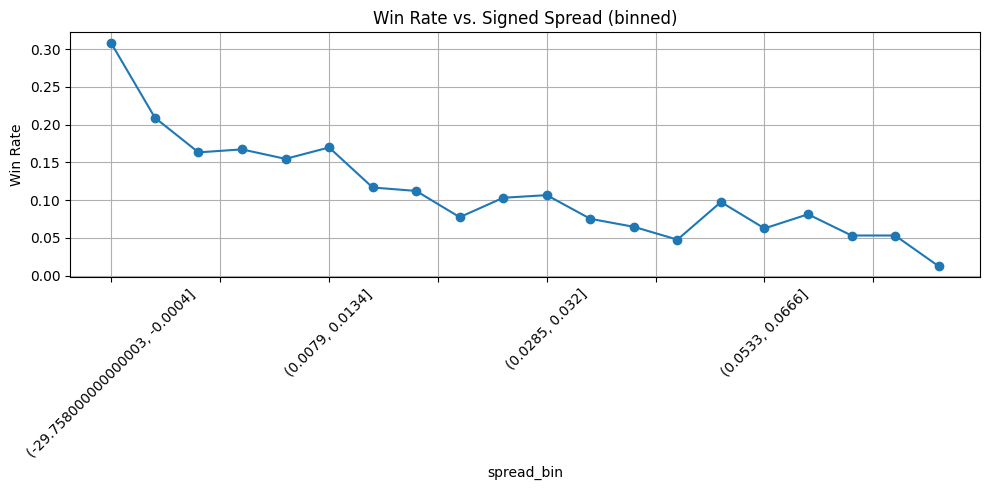

In [17]:
# Bin signed_spread and compute win rate per bin
# This is the key monotonic variable — Expect downward trend in win rate as signed_spread increases. 
# This means your model must be monotonic decreasing on signed_spread
df['spread_bin'] = pd.qcut(df['signed_spread'], q=20, duplicates='drop')
spread_win_rate = df.groupby('spread_bin')['won'].mean()

plt.figure(figsize=(10,5))
spread_win_rate.plot(marker='o')
plt.title("Win Rate vs. Signed Spread (binned)")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Dataset Split


In [18]:
# Sort chronologically
df = df.sort_values(by='DateTime').reset_index(drop=True)

# 70% train, 15% validation, 15% test
n = len(df)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

df_train = df.iloc[:train_end]
df_val = df.iloc[train_end:val_end]
df_test = df.iloc[val_end:]

print(f"Train size: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")

Train size: 4482, Val: 960, Test: 961


### Model Training


In [19]:
# Final feature set
features = [
    'signed_spread',
    'spread_per_dv01',
    'log_vol',
    'hour',
    'dayofweek',
    'num_dealers'
]
target = 'won'

In [20]:
# Extract train, val, test sets
X_train = df_train[features]
y_train = df_train[target]

X_val = df_val[features]
y_val = df_val[target]

X_test = df_test[features]
y_test = df_test[target]


In [55]:
# Standardize features (required for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
proba_val_lr = logreg.predict_proba(X_test_scaled)[:, 1]

In [66]:
from sklearn.ensemble import GradientBoostingClassifier


# Set monotonicity: signed_spread should be monotonic decreasing
monotone_constraints = (-1, 0, 0, 0, 0, 0)

xgb = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    monotone_constraints=monotone_constraints,
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(len(y_train) / y_train.sum())  # handle imbalance
)

xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Predictions
proba_val_xgb = xgb.predict_proba(X_test)[:, 1]

from lightgbm import LGBMClassifier

# Set same monotonic constraint: signed_spread must be decreasing
monotone_constraints = [-1, 0, 0, 0, 0, 0]

lgb = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.01,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    monotone_constraints=monotone_constraints,
    scale_pos_weight=(len(y_train) / y_train.sum()),
    random_state=42
)

lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Predictions
proba_val_lgb = lgb.predict_proba(X_test)[:, 1]

gbc = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

gbc.fit(X_train, y_train)

# Predict
proba_val_gbc = gbc.predict_proba(X_test)[:, 1]



[LightGBM] [Info] Number of positive: 519, number of negative: 3963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 4482, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115797 -> initscore=-2.032853
[LightGBM] [Info] Start training from score -2.032853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
from sklearn.metrics import make_scorer, brier_score_loss

brier_scorer = make_scorer(brier_score_loss, greater_is_better=False)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 700],
    'learning_rate': [0.001, 0.01, 0.02, 0.03],
    'max_depth': [1, 2, 3, 4, 6],
    'subsample': [0.4, 0.6, 0.8]
}

gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring=brier_scorer,
    cv=2,
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train, 
                eval_set=[(X_val, y_val)],)

print("Best Brier Score:", -grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


In [63]:
best_gbc = grid_search.best_estimator_
proba_val = best_gbc.predict_proba(X_test)[:, 1]

print("Validation Brier Score:", brier_score_loss(y_test, proba_val))
proba_val_gbc = best_gbc.predict_proba(X_test)[:, 1]



Validation Brier Score: 0.15092890274942344


### Model Evaluation


📈 Logistic Regression
AUC: 0.6585104474934983
Brier Score: 0.2478516496636626
Log Loss: 0.6920558540703089
📈 XGBoost (Monotonic)
AUC: 0.6518563357546409
Brier Score: 0.15300300668548739
Log Loss: 0.4787366486655891
📈 LightGBM (Monotonic)
AUC: 0.6462873284907182
Brier Score: 0.15066732035919383
Log Loss: 0.4728458039249113
📈 Gradient Boosting
AUC: 0.6772352255403102
Brier Score: 0.11597170966845818
Log Loss: 0.4060268587343288


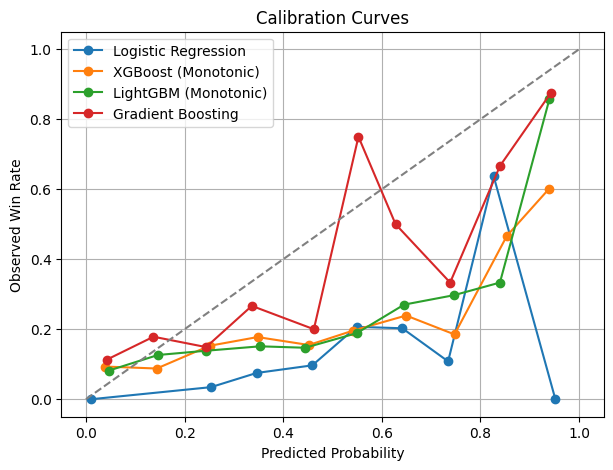

In [67]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


# Evaluate models
def evaluate_model(name, proba, y_true):
    print(f"📈 {name}")
    print("AUC:", roc_auc_score(y_true, proba))
    print("Brier Score:", brier_score_loss(y_true, proba))
    print("Log Loss:", log_loss(y_true, proba))
    
    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_true, proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.figure(figsize=(7,5))
evaluate_model("Logistic Regression", proba_val_lr, y_test)
evaluate_model("XGBoost (Monotonic)", proba_val_xgb, y_test)
evaluate_model("LightGBM (Monotonic)", proba_val_lgb, y_test)
evaluate_model("Gradient Boosting", proba_val_gbc, y_test)


plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("Calibration Curves")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Win Rate")
plt.legend()
plt.grid(True) 
plt.show()


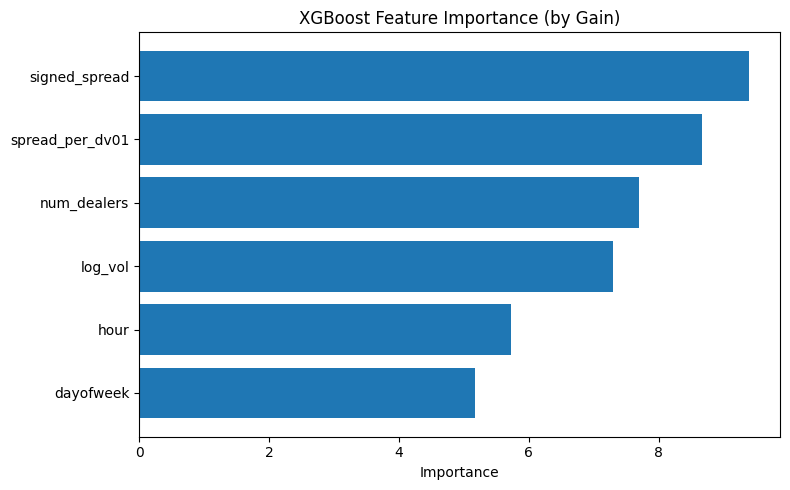

In [24]:
# Plot feature importance from the XGBoost model
xgb_importance = xgb.get_booster().get_score(importance_type='gain')
sorted_importance = sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)

# Visualize
labels, values = zip(*sorted_importance)
plt.figure(figsize=(8,5))
plt.barh(labels[::-1], values[::-1])
plt.title("XGBoost Feature Importance (by Gain)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Monoticity Check


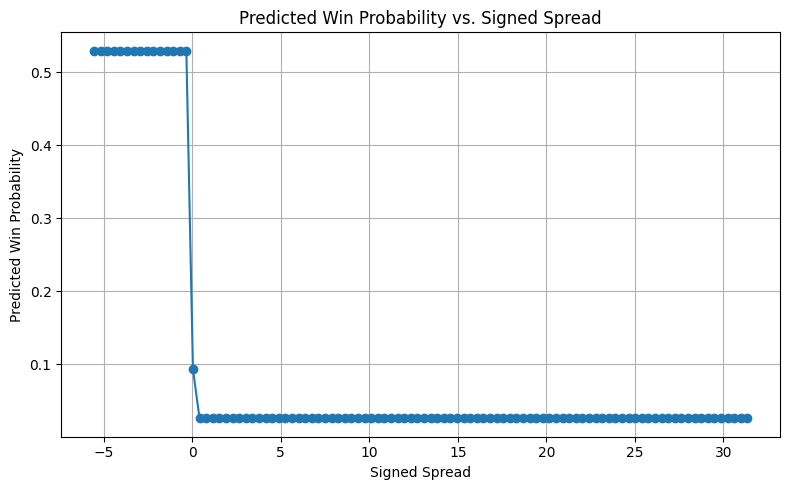

In [74]:
# 1. Use the median of each feature as baseline input
reference_input = X_val.median().to_frame().T

# 2. Generate a range of signed_spread values
spread_range = np.linspace(X_test['signed_spread'].min(), X_test['signed_spread'].max(), 100)

# 3. Simulate predictions
predicted_probs = []
for s in spread_range:
    temp_input = reference_input.copy()
    temp_input['signed_spread'] = s
    predicted_probs.append(lgb.predict_proba(temp_input[features])[:, 1][0])

# 4. Plot
plt.figure(figsize=(8,5))
plt.plot(spread_range, predicted_probs, marker='o')
plt.title("Predicted Win Probability vs. Signed Spread")
plt.xlabel("Signed Spread")
plt.ylabel("Predicted Win Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
import joblib
# Save the model
joblib.dump(lgb, 'lgb_model.pkl')

['lgb_model.pkl']